In [1]:
import scanpy as sc
import scvelo as scv
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
adata_hi = sc.read('gastrulation_hires.h5ad')
adata_lo = sc.read('gastrulation_lores.h5ad')

In [3]:
colormap_erythroid={
'Haematoendothelial progenitors':'#3361A5',
'Blood progenitors 1':'#248AF3',
'Blood progenitors 2':'#14B3FF',
'Erythroid1':'#88CEEF',
'Erythroid2':'#FDB31A',
'Erythroid3':'#E42A2A'
}

colormap_bonemarrow={
    'HSC_1': '#f781bf',
    'HSC_2': '#e78ac3',
    'Ery_1': '#a6d854',
    'Mono_1': '#e41a1c',
    'Precursors':'#984ea3',
    'CLP':'#e5c494',
    'Mono_2':'#e41a1c',
    'DCs':'#a6cee3',
    'Ery_2':'#4daf4a',
    'Mega':'#ff7f00', 
}

In [4]:
from scipy import stats
abcorr = []
agcorr = []
for i in range(adata_hi.shape[1]):
    x = adata_hi.layers['alpha'][:,i]
    y = adata_hi.layers['beta'][:,i]
    res = stats.pearsonr(x, y)
    # if res[1] < 0.01:
    abcorr.append(res[0])

    x = adata_hi.layers['alpha'][:,i]
    y = adata_hi.layers['gamma'][:,i]
    res = stats.pearsonr(x, y)
    # if res[1] < 0.01:
    agcorr.append(res[0])

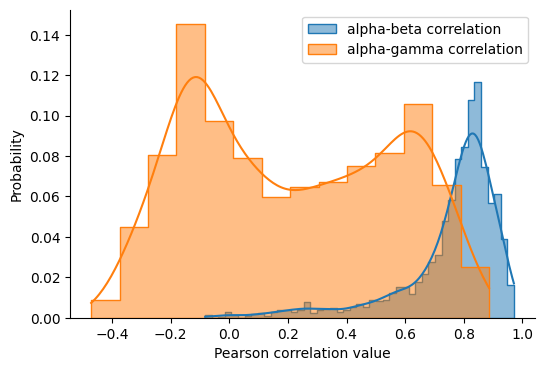

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.histplot(abcorr, stat='probability', label='alpha-beta correlation', 
             element="step", alpha=0.5, 
             ax=ax, kde=True, legend=True)
sns.histplot(agcorr, stat='probability', label='alpha-gamma correlation',
             element="step", alpha=0.5,
             ax=ax, kde=True, legend=True)

ax.legend()

# Optionally, set labels and title
ax.set_xlabel('Pearson correlation value')
ax.set_ylabel('Probability')
# ax.set_title('Alpha-Beta and Alpha-Gamma Correlation Comparison')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("erythroid_corr.pdf", format='pdf',bbox_inches='tight')
plt.show()

computing velocity graph (using 10/32 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:01:30) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_erythroid_hires_velocity.svg


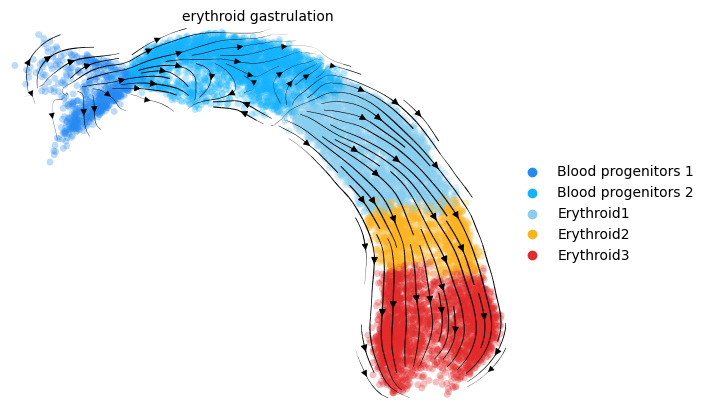

In [6]:
scv.tl.velocity_graph(adata_hi, vkey='spliced_velocity', n_jobs=10)
scv.pl.velocity_embedding_stream(adata_hi, vkey='spliced_velocity', 
                                 palette=colormap_erythroid,
                                 title='erythroid gastrulation',
                                 linewidth=0.5,
                                 # figsize=(4,4),
                                 legend_loc ='right',
                                 save='erythroid_hires_velocity.svg',
                                 basis='umap',c='celltype')

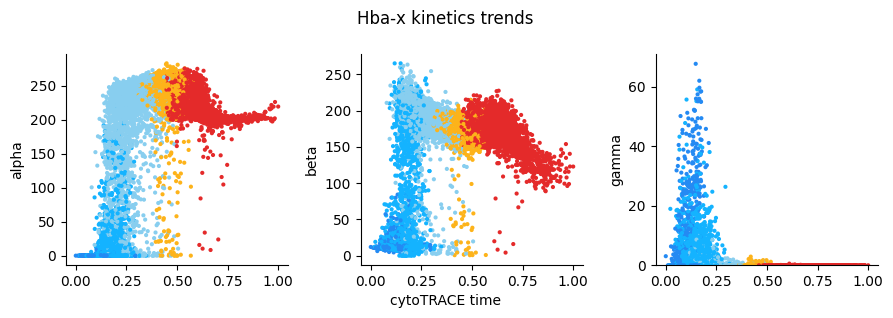

In [7]:
gene = 'Hba-x'
pt_key='ct_pseudotime'
hue = 'celltype'
adata = adata_hi

for i in range(adata.shape[1]):
    if adata.var.index[i] == gene:
        break

fig, axes = plt.subplots(1, 3, figsize=(9, 3))


sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['alpha'][:, i]).reshape(-1),
                palette=colormap_erythroid,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[0])
axes[0].set_ylabel('alpha')
axes[0].set_xlabel('')
axes[0].get_legend().remove()

# Plot 3
sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['beta'][:, i]).reshape(-1),
                palette=colormap_erythroid,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[1])
axes[1].set_ylabel('beta')
axes[1].set_xlabel('')
axes[1].get_legend().remove()

sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['gamma'][:, i]).reshape(-1),
                palette=colormap_erythroid,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[2])
axes[2].set_ylabel('gamma')
axes[2].set_xlabel('')
axes[2].get_legend().remove()
axes[2].set_ylim(0,)
# Remove top and right spines
for j in range(3):
    axes[j].spines['top'].set_visible(False)
    axes[j].spines['right'].set_visible(False)
handles, labels = axes[0].get_legend_handles_labels()
    
fig.suptitle(gene + ' kinetics trends')
plt.figtext(0.5, 0.01, 'cytoTRACE time', ha='center', va='center')
# fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.tight_layout()
plt.savefig("erythroid_hires_Hba-x.pdf", format='pdf')
plt.show()

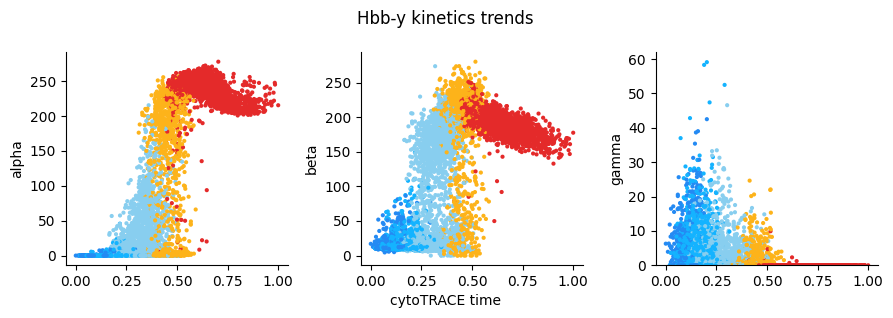

In [8]:
gene = 'Hbb-y'
pt_key='ct_pseudotime'
hue = 'celltype'
adata = adata_hi

for i in range(adata.shape[1]):
    if adata.var.index[i] == gene:
        break

fig, axes = plt.subplots(1, 3, figsize=(9, 3))


sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['alpha'][:, i]).reshape(-1),
                palette=colormap_erythroid,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[0])
axes[0].set_ylabel('alpha')
axes[0].set_xlabel('')
axes[0].get_legend().remove()

# Plot 3
sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['beta'][:, i]).reshape(-1),
                palette=colormap_erythroid,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[1])
axes[1].set_ylabel('beta')
axes[1].set_xlabel('')
axes[1].get_legend().remove()

sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['gamma'][:, i]).reshape(-1),
                palette=colormap_erythroid,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[2])
axes[2].set_ylabel('gamma')
axes[2].set_xlabel('')
axes[2].get_legend().remove()
axes[2].set_ylim(0,)
# Remove top and right spines
for j in range(3):
    axes[j].spines['top'].set_visible(False)
    axes[j].spines['right'].set_visible(False)
handles, labels = axes[0].get_legend_handles_labels()
    
fig.suptitle(gene + ' kinetics trends')
plt.figtext(0.5, 0.01, 'cytoTRACE time', ha='center', va='center')
# fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.tight_layout()
plt.savefig("erythroid_hires_Hbb-y.pdf", format='pdf')
plt.show()

In [9]:
# scv.tl.velocity_graph(adata_lo, vkey='spliced_velocity',n_jobs=1)
# scv.pl.velocity_embedding_stream(adata_lo, vkey='spliced_velocity', 
#                                  palette=colormap_erythroid,
#                                  title='coarse grained',
#                                  linewidth=0.5,
#                                  # figsize=(4,2),
#                                  legend_loc ='right',
#                                  save='erythroid_sckinetics_lores_velocity.svg',
#                                  basis='umap',c='celltype')

In [10]:
# gene = 'Hba-x'
# pt_key='ct_pseudotime'
# hue = 'celltype'
# adata = adata_lo

# for i in range(adata.shape[1]):
#     if adata.var.index[i] == gene:
#         break

# fig, axes = plt.subplots(1, 3, figsize=(9, 3))


# sns.scatterplot(x=adata.obs[pt_key],
#                 y=np.array(adata.layers['alpha'][:, i]).reshape(-1),
#                 palette=colormap_erythroid,
#                 hue=adata.obs[hue], edgecolor='none', ax=axes[0])
# axes[0].set_ylabel('alpha')
# axes[0].set_xlabel('')
# axes[0].get_legend().remove()

# # Plot 3
# sns.scatterplot(x=adata.obs[pt_key],
#                 y=np.array(adata.layers['beta'][:, i]).reshape(-1),
#                 palette=colormap_erythroid,
#                 hue=adata.obs[hue], edgecolor='none', ax=axes[1])
# axes[1].set_ylabel('beta')
# axes[1].set_xlabel('')
# axes[1].get_legend().remove()

# sns.scatterplot(x=adata.obs[pt_key],
#                 y=np.array(adata.layers['gamma'][:, i]).reshape(-1),
#                 palette=colormap_erythroid,
#                 hue=adata.obs[hue], edgecolor='none', ax=axes[2])
# axes[2].set_ylabel('gamma')
# axes[2].set_xlabel('')
# axes[2].get_legend().remove()
# axes[2].set_ylim(0,)
# # Remove top and right spines
# for j in range(3):
#     axes[j].spines['top'].set_visible(False)
#     axes[j].spines['right'].set_visible(False)
# handles, labels = axes[0].get_legend_handles_labels()
    
# fig.suptitle(gene + ' kinetics trends')
# # fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=4)

# plt.show()

In [11]:
adata_hi = sc.read('bonemarrow_hires.h5ad')
adata_lo = sc.read('bonemarrow_lores.h5ad')

computing velocity graph (using 10/32 cores)
    finished (0:00:10) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'spliced_velocity_tsne', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_bonemarrow_hires_velocity.svg


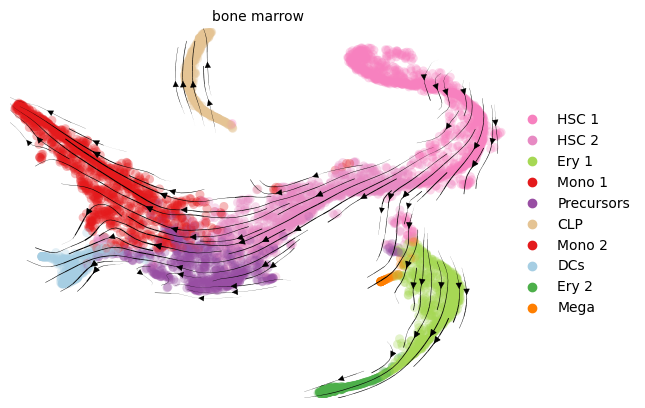

In [12]:
scv.tl.velocity_graph(adata_hi, vkey='spliced_velocity', n_jobs=10)
scv.pl.velocity_embedding_stream(adata_hi, vkey='spliced_velocity', 
                                 title='bone marrow',
                                 linewidth=0.5,
                                 legend_loc ='right',
                                 save='bonemarrow_hires_velocity.svg',
                                 basis='tsne',c='clusters')

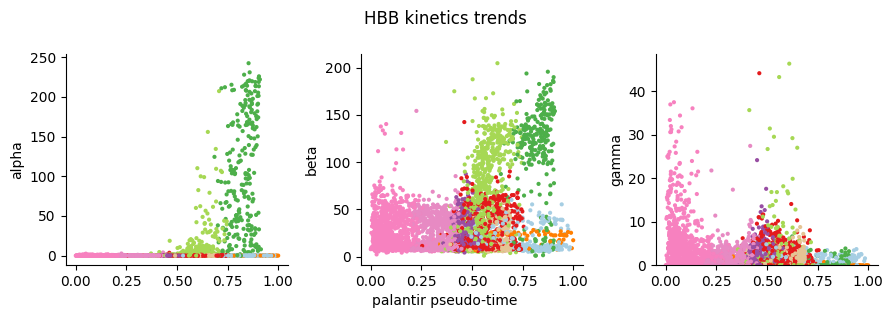

In [13]:
gene = 'HBB'
pt_key='palantir_pseudotime'
hue = 'clusters'
adata = adata_hi

for i in range(adata.shape[1]):
    if adata.var.index[i] == gene:
        break

fig, axes = plt.subplots(1, 3, figsize=(9, 3))


sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['alpha'][:, i]).reshape(-1),
                palette=colormap_bonemarrow,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[0])
axes[0].set_ylabel('alpha')
axes[0].set_xlabel('')
axes[0].get_legend().remove()

# Plot 3
sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['beta'][:, i]).reshape(-1),
                palette=colormap_bonemarrow,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[1])
axes[1].set_ylabel('beta')
axes[1].set_xlabel('')
axes[1].get_legend().remove()

sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['gamma'][:, i]).reshape(-1),
                palette=colormap_bonemarrow,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[2])
axes[2].set_ylabel('gamma')
axes[2].set_xlabel('')
axes[2].get_legend().remove()
axes[2].set_ylim(0,)
# Remove top and right spines
for j in range(3):
    axes[j].spines['top'].set_visible(False)
    axes[j].spines['right'].set_visible(False)
handles, labels = axes[0].get_legend_handles_labels()
    
fig.suptitle(gene + ' kinetics trends')
plt.figtext(0.5, 0.01, 'palantir pseudo-time', ha='center', va='center')
# fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.tight_layout()
plt.savefig("bonemarrow_hires_HBB.pdf", format='pdf')
plt.show()

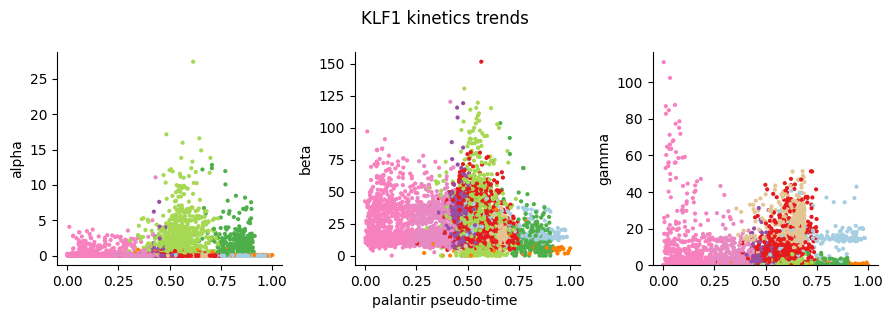

In [14]:
gene = 'KLF1'
pt_key='palantir_pseudotime'
hue = 'clusters'
adata = adata_hi

for i in range(adata.shape[1]):
    if adata.var.index[i] == gene:
        break

fig, axes = plt.subplots(1, 3, figsize=(9, 3))


sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['alpha'][:, i]).reshape(-1),
                palette=colormap_bonemarrow,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[0])
axes[0].set_ylabel('alpha')
axes[0].set_xlabel('')
axes[0].get_legend().remove()

# Plot 3
sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['beta'][:, i]).reshape(-1),
                palette=colormap_bonemarrow,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[1])
axes[1].set_ylabel('beta')
axes[1].set_xlabel('')
axes[1].get_legend().remove()

sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['gamma'][:, i]).reshape(-1),
                palette=colormap_bonemarrow,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[2])
axes[2].set_ylabel('gamma')
axes[2].set_xlabel('')
axes[2].get_legend().remove()
axes[2].set_ylim(0,)
# Remove top and right spines
for j in range(3):
    axes[j].spines['top'].set_visible(False)
    axes[j].spines['right'].set_visible(False)
handles, labels = axes[0].get_legend_handles_labels()
    
fig.suptitle(gene + ' kinetics trends')
plt.figtext(0.5, 0.01, 'palantir pseudo-time', ha='center', va='center')
# fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.tight_layout()
plt.savefig("bonemarrow_hires_KLF1.pdf", format='pdf')
plt.show()

In [15]:
# def phase_plot_velocity(adata, gene=None, hue=None,
#                         palette=None,
#                         vkey={'unspliced_velocity': "unspliced_velocity",
#                               'spliced_velocity': "spliced_velocity"},
#                         ukey='Mu', skey='Ms',
#                         arrow_length=1e-3,
#                         density=0.5,
#                         width=.0015,
#                         dpi=120,):
#     """
#     plot velocity in the phase plot.
#     :param adata:
#     :return:
#     """
#     for i in range(adata.shape[1]):
#         if adata.var.index[i] == gene:
#             break
#     x = np.array(adata.layers[skey][:, i]).reshape(-1, 1)
#     y = np.array(adata.layers[ukey][:, i]).reshape(-1, 1)

#     print(i)

#     x_v = np.array(adata.layers[vkey['spliced_velocity']][:, i]).reshape(-1, 1)
#     y_v = np.array(adata.layers[vkey['unspliced_velocity']][:, i]).reshape(-1, 1)

#     X = np.concatenate((x, y), axis=1)
#     V = np.concatenate((x_v, y_v), axis=1)

#     adata_new = sc.AnnData(X=X, obs=adata.obs)
#     adata_new.layers['Ms'] = X
#     adata_new.obsm['X_' + gene] = X
#     adata_new.layers[gene + '_velocity'] = V

#     scv.pl.velocity_embedding(adata_new, basis=gene, X=X, V=V, c=hue, vkey=gene + '_velocity',
#                               palette=palette,
#                               # color='b',
#                               width=width,arrow_length=arrow_length,density=density,
#                               frameon='artist', marker='o',s=30,alpha=1,
#                               xlabel='spliced', ylabel='unspliced',
#                               figsize=(5,5),
#                               title=gene,
#                               dpi=dpi)

In [16]:
# phase_plot_velocity(adata_hi, 'KLF1', hue='clusters',
#                     palette=colormap_bonemarrow,
#                     arrow_length=1e-2)

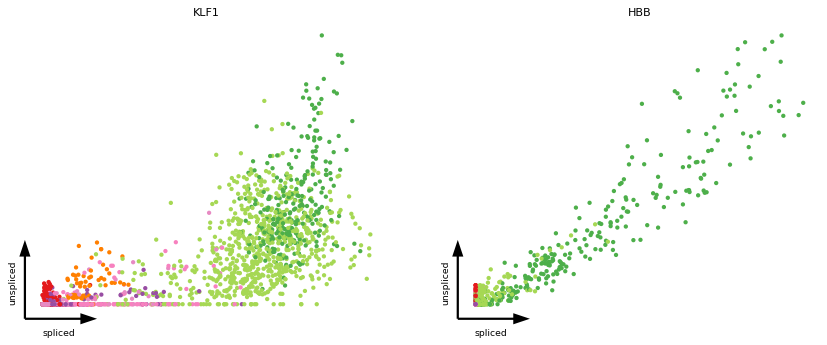

In [17]:
scv.pl.scatter(adata_hi, basis=['KLF1', 'HBB'], vkey='velocity',
               s=60, linewidth=1.5, frameon='artist', dpi=80)

In [18]:
abcorr = []
agcorr = []
for i in range(adata_hi.shape[1]):
    x = adata_hi.layers['alpha'][:,i]
    y = adata_hi.layers['beta'][:,i]
    res = stats.pearsonr(x, y)
    # if res[1] < 0.01:
    abcorr.append(res[0])

    x = adata_hi.layers['alpha'][:,i]
    y = adata_hi.layers['gamma'][:,i]
    res = stats.pearsonr(x, y)
    # if res[1] < 0.01:
    agcorr.append(res[0])

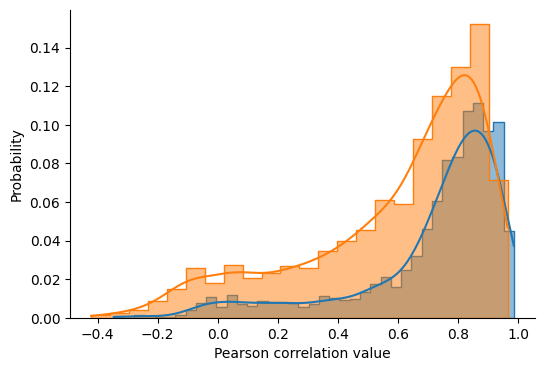

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.histplot(abcorr, stat='probability', label='alpha-beta correlation', 
             element="step", alpha=0.5, 
             ax=ax, kde=True, legend=True)
sns.histplot(agcorr, stat='probability', label='alpha-gamma correlation',
             element="step", alpha=0.5,
             ax=ax, kde=True, legend=True)

# ax.legend()

# Optionally, set labels and title
ax.set_xlabel('Pearson correlation value')
ax.set_ylabel('Probability')
# ax.set_title('Alpha-Beta and Alpha-Gamma Correlation Comparison')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("bonemarrow_corr.pdf", format='pdf',bbox_inches='tight')
plt.show()

In [20]:
adata_hi = sc.read('pancreas_hires.h5ad')
adata_lo = sc.read('pancreas_lores.h5ad')

In [21]:
abcorr = []
agcorr = []
for i in range(adata_hi.shape[1]):
    x = adata_hi.layers['alpha'][:,i]
    y = adata_hi.layers['beta'][:,i]
    res = stats.pearsonr(x, y)
    # if res[1] < 0.01:
    abcorr.append(res[0])

    x = adata_hi.layers['alpha'][:,i]
    y = adata_hi.layers['gamma'][:,i]
    res = stats.pearsonr(x, y)
    # if res[1] < 0.01:
    agcorr.append(res[0])

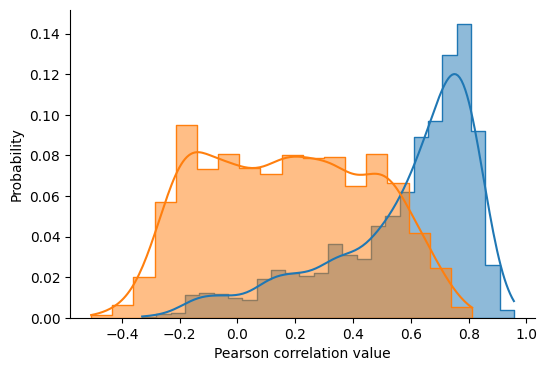

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.histplot(abcorr, stat='probability', label='alpha-beta correlation', 
             element="step", alpha=0.5, 
             ax=ax, kde=True, legend=True)
sns.histplot(agcorr, stat='probability', label='alpha-gamma correlation',
             element="step", alpha=0.5,
             ax=ax, kde=True, legend=True)

# ax.legend()

# Optionally, set labels and title
ax.set_xlabel('Pearson correlation value')
ax.set_ylabel('Probability')
# ax.set_title('Alpha-Beta and Alpha-Gamma Correlation Comparison')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("pancreas_corr.pdf", format='pdf',bbox_inches='tight')
plt.show()

computing velocity graph (using 10/32 cores)
    finished (0:00:03) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_pancreas_hires_velocity.svg


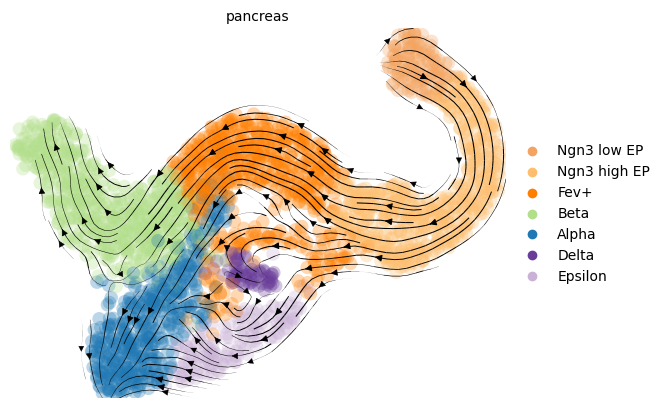

In [23]:
scv.tl.velocity_graph(adata_hi, vkey='spliced_velocity', n_jobs=10)
scv.pl.velocity_embedding_stream(adata_hi, vkey='spliced_velocity', 
                                 title='pancreas',
                                 linewidth=0.5,
                                 legend_loc ='right',
                                 save='pancreas_hires_velocity.svg',
                                 basis='umap',c='clusters')

In [24]:
colormap_pancreas = {
    'Ngn3 low EP': '#f4a460',
    'Ngn3 high EP': '#fdbf6f',
    'Fev+': '#ff7f00',
    'Beta': '#b2df8a',
    'Alpha': '#1f78b4',
    'Delta': '#6a3d9a',
    'Epsilon': '#cab2d6',
}

In [25]:
adata_hi.uns['clusters_colors']

array(['#f4a460', '#fdbf6f', '#ff7f00', '#b2df8a', '#1f78b4', '#6a3d9a',
       '#cab2d6'], dtype=object)

In [26]:
adata_hi.obs.clusters.cat.categories

Index(['Ngn3 low EP', 'Ngn3 high EP', 'Fev+', 'Beta', 'Alpha', 'Delta',
       'Epsilon'],
      dtype='object')

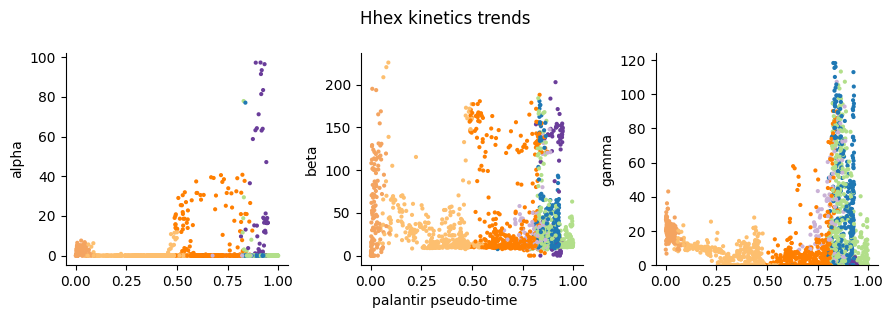

In [27]:
gene = 'Hhex'
pt_key='palantir_pseudotime'
hue = 'clusters'
adata = adata_hi

for i in range(adata.shape[1]):
    if adata.var.index[i] == gene:
        break

fig, axes = plt.subplots(1, 3, figsize=(9, 3))


sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['alpha'][:, i]).reshape(-1),
                palette=colormap_pancreas,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[0])
axes[0].set_ylabel('alpha')
axes[0].set_xlabel('')
axes[0].get_legend().remove()

# Plot 3
sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['beta'][:, i]).reshape(-1),
                palette=colormap_pancreas,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[1])
axes[1].set_ylabel('beta')
axes[1].set_xlabel('')
axes[1].get_legend().remove()

sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['gamma'][:, i]).reshape(-1),
                palette=colormap_pancreas,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[2])
axes[2].set_ylabel('gamma')
axes[2].set_xlabel('')
axes[2].get_legend().remove()
axes[2].set_ylim(0,)
# Remove top and right spines
for j in range(3):
    axes[j].spines['top'].set_visible(False)
    axes[j].spines['right'].set_visible(False)
handles, labels = axes[0].get_legend_handles_labels()
    
fig.suptitle(gene + ' kinetics trends')
plt.figtext(0.5, 0.01, 'palantir pseudo-time', ha='center', va='center')
# fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.tight_layout()
plt.savefig("pancreas_hires_Hhex.pdf", format='pdf')
plt.show()

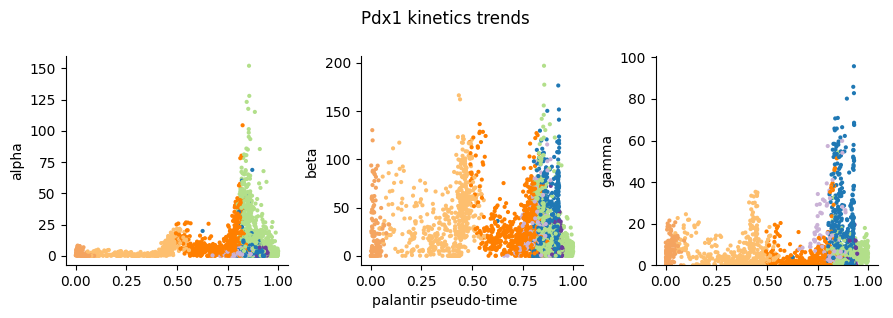

In [28]:
gene = 'Pdx1'
pt_key='palantir_pseudotime'
hue = 'clusters'
adata = adata_hi

for i in range(adata.shape[1]):
    if adata.var.index[i] == gene:
        break

fig, axes = plt.subplots(1, 3, figsize=(9, 3))


sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['alpha'][:, i]).reshape(-1),
                palette=colormap_pancreas,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[0])
axes[0].set_ylabel('alpha')
axes[0].set_xlabel('')
axes[0].get_legend().remove()

# Plot 3
sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['beta'][:, i]).reshape(-1),
                palette=colormap_pancreas,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[1])
axes[1].set_ylabel('beta')
axes[1].set_xlabel('')
axes[1].get_legend().remove()

sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['gamma'][:, i]).reshape(-1),
                palette=colormap_pancreas,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[2])
axes[2].set_ylabel('gamma')
axes[2].set_xlabel('')
axes[2].get_legend().remove()
axes[2].set_ylim(0,)
# Remove top and right spines
for j in range(3):
    axes[j].spines['top'].set_visible(False)
    axes[j].spines['right'].set_visible(False)
handles, labels = axes[0].get_legend_handles_labels()
    
fig.suptitle(gene + ' kinetics trends')
plt.figtext(0.5, 0.01, 'palantir pseudo-time', ha='center', va='center')
# fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.tight_layout()
plt.savefig("pancreas_hires_Pdx1.pdf", format='pdf')
plt.show()

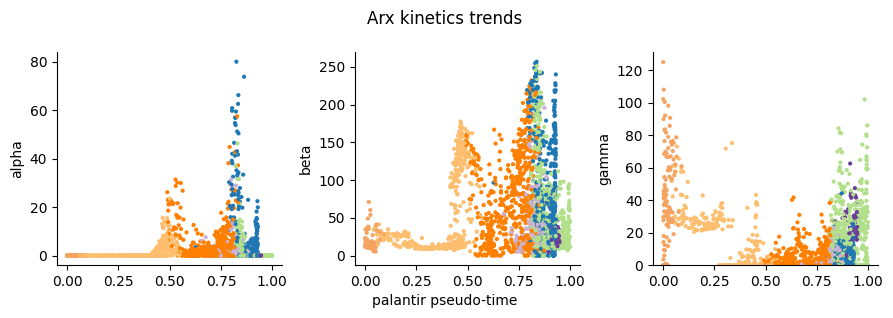

In [29]:
gene = 'Arx'
pt_key='palantir_pseudotime'
hue = 'clusters'
adata = adata_hi

for i in range(adata.shape[1]):
    if adata.var.index[i] == gene:
        break

fig, axes = plt.subplots(1, 3, figsize=(9, 3))


sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['alpha'][:, i]).reshape(-1),
                palette=colormap_pancreas,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[0])
axes[0].set_ylabel('alpha')
axes[0].set_xlabel('')
axes[0].get_legend().remove()

# Plot 3
sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['beta'][:, i]).reshape(-1),
                palette=colormap_pancreas,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[1])
axes[1].set_ylabel('beta')
axes[1].set_xlabel('')
axes[1].get_legend().remove()

sns.scatterplot(x=adata.obs[pt_key],
                y=np.array(adata.layers['gamma'][:, i]).reshape(-1),
                palette=colormap_pancreas,
                marker='.',
                hue=adata.obs[hue], edgecolor='none', ax=axes[2])
axes[2].set_ylabel('gamma')
axes[2].set_xlabel('')
axes[2].get_legend().remove()
axes[2].set_ylim(0,)
# Remove top and right spines
for j in range(3):
    axes[j].spines['top'].set_visible(False)
    axes[j].spines['right'].set_visible(False)
handles, labels = axes[0].get_legend_handles_labels()
    
fig.suptitle(gene + ' kinetics trends')
plt.figtext(0.5, 0.01, 'palantir pseudo-time', ha='center', va='center')
# fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.tight_layout()
plt.savefig("pancreas_hires_Arx.pdf", format='pdf')
plt.show()